In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
x = pd.DataFrame(np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]))
Y = pd.DataFrame(np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]))
plt.scatter(x, Y)
plt.show()

In [ ]:
class LogisticRegression:
  def __init__(self):
    self.b = np.zeros(x.shape[1]+1).reshape(x.shape[1]+1, 1)
  def segmoid(self, x):
    return 1 / (1 + np.exp(-x @ self.b))
  def predict(self, x):
    return self.segmoid(x)

  def coefs(self):
    return self.b
  def LogLikelihood(self, x, Y):
    return (Y*np.log(self.predict(x)) + (1 - Y)*np.log(1 - self.predict(x))).sum()
  def CrossEntropy(self, x, Y):
    return (-Y*np.log(self.predict(x)) - (1 - Y)*np.log(1 - self.predict(x))).sum()

  def fit(self, x, Y, alpha=0.001, maxSteps=5000, Rtype='LL'):
    steps, errors = [], []
    step = 0
    for _ in range(maxSteps):
      if Rtype == 'LL':
        newError = self.LogLikelihood(x, Y)
        dJ_b = -x.T @ (self.predict(x) - Y)
        self.b += alpha * dJ_b
      elif Rtype == 'CE':
        newError = self.CrossEntropy(x, Y)
        dJ_b = -x.T @ (-self.predict(x) + Y)
        self.b -= alpha * dJ_b
      step += 1
      steps.append(step)
      errors.append(newError)

    return steps, errors


In [ ]:
x_ = x.copy()
intercept = np.ones((x.shape[0], 1))
x_ = pd.DataFrame(np.concatenate((intercept, x), axis = 1))

In [ ]:
x_

In [ ]:
regr = LogisticRegression()
steps, errors = regr.fit(x_, Y, 0.0005, 5000, Rtype='LL')
Y_pred = regr.predict(x_)

In [ ]:
plt.scatter(x, Y)
plt.scatter(x, Y_pred)

In [ ]:
plt.plot(steps, errors)
plt.show()

In [ ]:
Y_pred

# ЛР 2

In [41]:
df = pd.read_csv('loan_train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
df = df.drop('Loan_ID', axis = 1)

In [43]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Замена пропусков

In [45]:
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'].values)
df['Married'] = labelencoder.fit_transform(df['Married'].values)
df['Education'] = labelencoder.fit_transform(df['Education'].values)
df['Self_Employed'] = labelencoder.fit_transform(df['Self_Employed'].values)
df['Dependents'] = labelencoder.fit_transform(df['Dependents'].values)
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'].values)
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'].values)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


(array([345.,   0., 102.,   0.,   0., 101.,   0.,  51.,   0.,  15.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

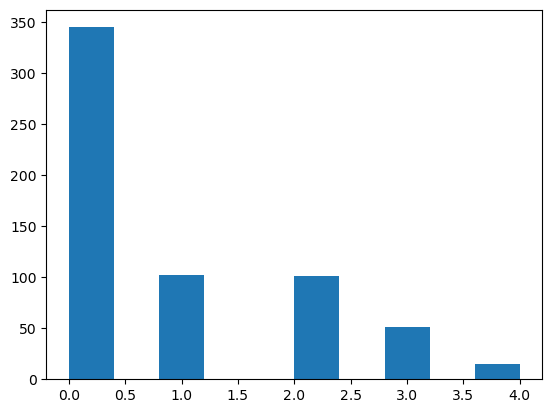

In [46]:
plt.hist(df['Dependents'])

In [47]:
np.mean(df['Dependents'])

0.8420195439739414

<Axes: >

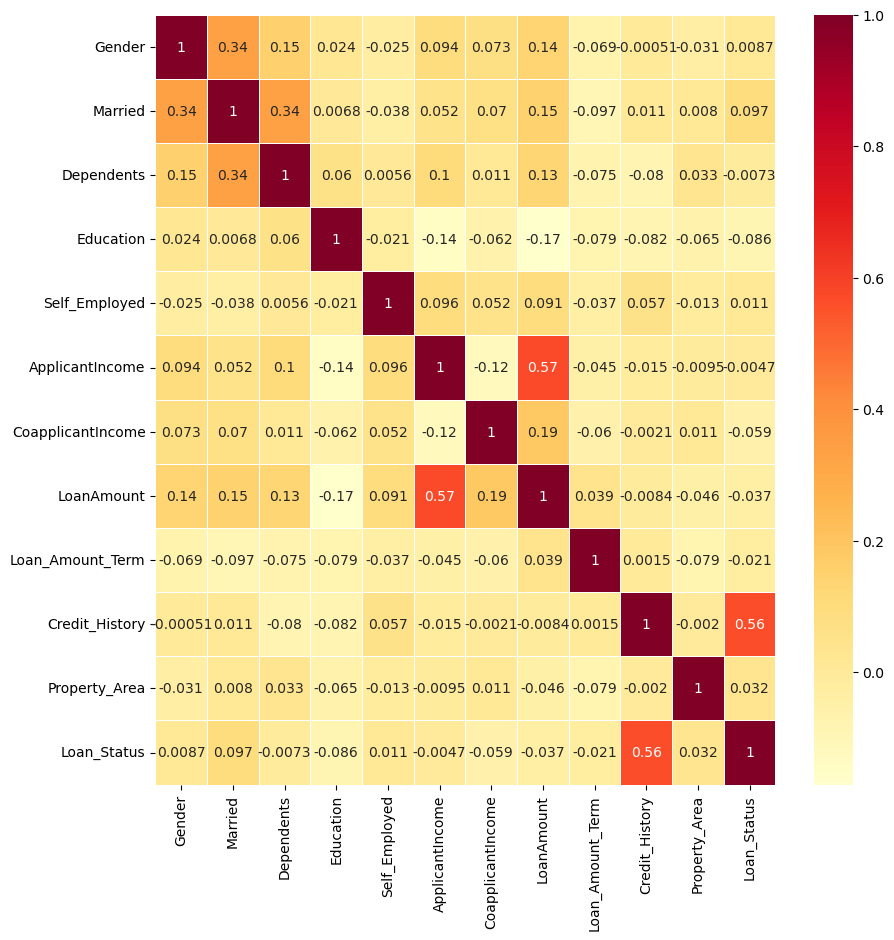

In [48]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() , annot=True, cmap='YlOrRd', linewidths=0.5)

In [49]:
df['Gender'] = df['Gender'].apply(lambda l: l if not pd.isna(l) else np.median(df['Gender']))
df['Married'] = df['Married'].apply(lambda l: l if not pd.isna(l) else np.median(df['Married']))
df['Dependents'] = df['Dependents'].apply(lambda l: l if not pd.isna(l) else np.median(df['Dependents']))
df['Self_Employed'] = df['Self_Employed'].apply(lambda l: l if not pd.isna(l) else np.median(df['Self_Employed']))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [50]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
from sklearn.impute import KNNImputer
def fill_missing_with_knn(df):
    imputer = KNNImputer(n_neighbors=5)
    df_filled = imputer.fit_transform(df)
    return pd.DataFrame(df_filled, columns=df.columns)

df = fill_missing_with_knn(df)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,147.8,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


# Преобразование данных

{'whiskers': [<matplotlib.lines.Line2D at 0x1b94bb026e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b94bb02c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b94bb02440>],
 'medians': [<matplotlib.lines.Line2D at 0x1b94bb03160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b94bb03400>],
 'means': []}

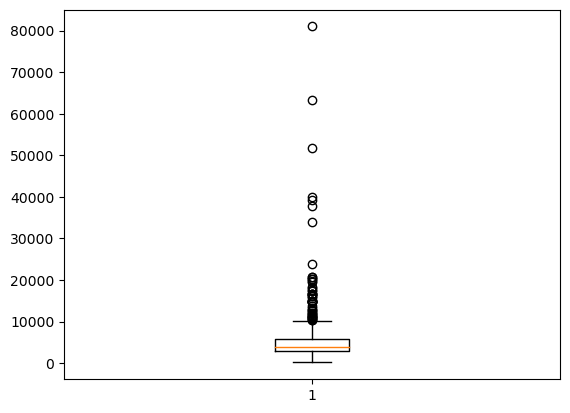

In [15]:
plt.boxplot(df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b94696b250>,
 'caps': [<matplotlib.lines.Line2D at 0x1b94696b7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b94696b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b94696bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b94696bfa0>],
 'means': []}

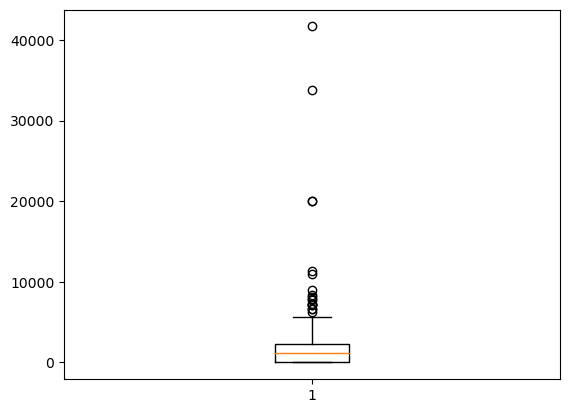

In [16]:
plt.boxplot(df['CoapplicantIncome'])

In [53]:
def replace_outliers_with_median_for_column(df, column_name, threshold=1.5):
    data = df[column_name]
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    median = np.median(data)
    
    data_without_outliers = np.where((data < lower_bound) | (data > upper_bound), median, data)
    
    df[column_name] = data_without_outliers
    
    return df

In [54]:
replace_outliers_with_median_for_column(df, 'ApplicantIncome')
replace_outliers_with_median_for_column(df, 'CoapplicantIncome')
replace_outliers_with_median_for_column(df, 'LoanAmount')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,147.8,0.743590,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,0.743590,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,0.743590,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,0.743590,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,0.743590,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,0.358974,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,0.743590,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,0.743590,1.0,2.0,1.0


# Нормализация

In [55]:
def normalize_data_frame(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        if normalized_df[column].dtype in [int, float]:
            max_val = normalized_df[column].max()
            min_val = normalized_df[column].min()
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df
df = normalize_data_frame(df)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.5,0.0,0.00,0.0,0.0,0.570528,0.000000,0.537984,0.743590,1.0,1.0,1.0
1,0.5,0.5,0.25,0.0,0.0,0.443788,0.264515,0.461240,0.743590,1.0,0.0,0.0
2,0.5,0.5,0.00,0.0,0.5,0.285314,0.000000,0.220930,0.743590,1.0,1.0,1.0
3,0.5,0.5,0.00,1.0,0.0,0.243568,0.413612,0.430233,0.743590,1.0,1.0,1.0
4,0.5,0.0,0.00,0.0,0.0,0.585644,0.000000,0.511628,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.00,0.0,0.0,0.275303,0.000000,0.240310,0.743590,1.0,0.0,1.0
610,0.5,0.5,0.75,0.0,0.0,0.396036,0.000000,0.120155,0.358974,1.0,0.0,1.0
611,0.5,0.5,0.25,0.0,0.0,0.793072,0.042098,0.945736,0.743590,1.0,1.0,1.0
612,0.5,0.5,0.50,0.0,0.0,0.744119,0.000000,0.689922,0.743590,1.0,1.0,1.0


# Обучение модели

In [56]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

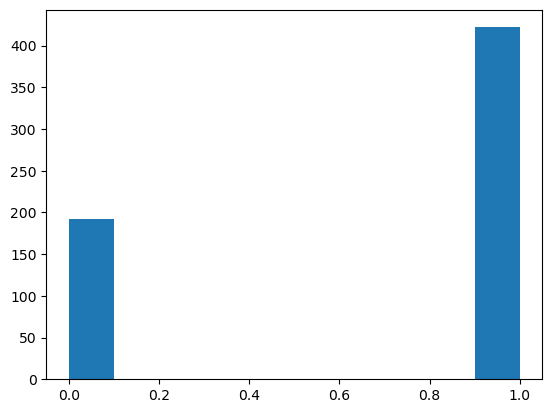

In [57]:
plt.hist(y)
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [59]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [60]:
x_ = X_train.copy()
intercept = np.ones((X_train.shape[0], 1))
x_ = pd.DataFrame(np.concatenate((intercept, X_train), axis = 1))

X_test = X_test.reset_index(drop = True)
intercept = np.ones((X_test.shape[0], 1))
X_test = pd.DataFrame(np.concatenate((intercept, X_test), axis = 1))

In [81]:
class LogisticRegression:
  def __init__(self, x):
    self.b = np.zeros(x.shape[1])
  def segmoid(self, x):
    return 1 / (1 + np.exp(-x @ self.b))
  def predict(self, x):
    return [1 if value > 0.500008 else 0 for value in self.segmoid(x)]

  def coefs(self):
    return self.b
  def LogLikelihood(self, x, Y):
    return (Y*np.log(self.segmoid(x)) + (1 - Y)*np.log(1 - self.segmoid(x))).sum()
  def CrossEntropy(self, x, Y):
    return (-Y*np.log(self.segmoid(x)) - (1 - Y)*np.log(1 - self.segmoid(x))).sum()

  def fit(self, x, Y, alpha=0.001, maxSteps=5000, Rtype='LL'):
    steps, errors = [], []
    step = 0
    for _ in range(maxSteps):
      if Rtype == 'LL':
        newError = self.LogLikelihood(x, Y)
        print()
        dJ_b = -x.T @ (self.segmoid(x) - Y)
        self.b += alpha * dJ_b
      elif Rtype == 'CE':
        newError = self.CrossEntropy(x, Y)
        dJ_b = -x.T @ (-self.segmoid(x) + Y)
        self.b -= alpha * dJ_b
      step += 1
      steps.append(step)
      errors.append(newError)


    return steps, errors


# Максимизация логарифмического правдоподобия

In [82]:
regr = LogisticRegression(x_)
steps, errors = regr.fit(x_, y_train, 10**-11, 10000, Rtype='LL')

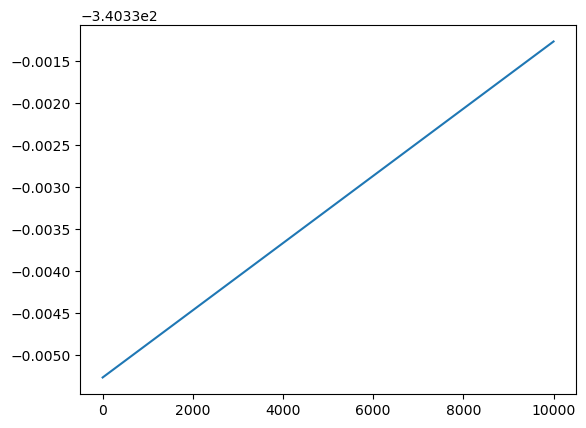

In [84]:
plt.plot(steps, errors)

In [ ]:
plt.hist(np.array(regr.segmoid(X_test)))

In [85]:
y_pred = regr.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.47      0.58        43
         1.0       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



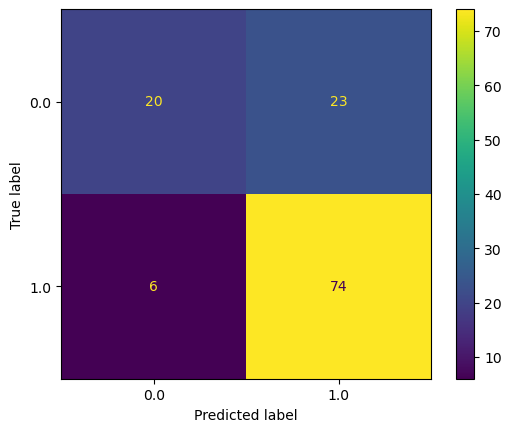

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)
plt.show()

# Кросс энтропия

In [101]:
regr = LogisticRegression(x_)
steps, errors = regr.fit(x_, y_train, 0.001, 5000, Rtype='CE')
y_pred = regr.predict(X_test)

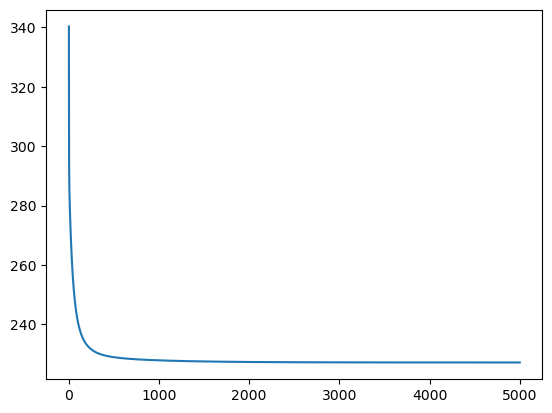

In [102]:
plt.plot(steps, errors)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.44      0.60        43
         1.0       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



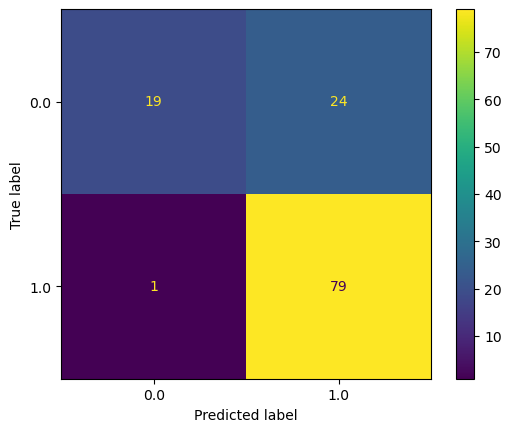

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)
plt.show()